In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
df = pd.read_csv('df_all.csv', delimiter = ',')
df = df.drop(['Unnamed: 0'], axis=1) # drop columns
df = df.astype('float32')
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:48]
Y = dataset[:,48]
print(X.shape, Y.shape)

(1810, 48) (1810,)


In [3]:
X

array([[ 187.07556152,   72.49732208,  234.44749451, ...,  186.21679688,
           1.06143844,   49.03845978],
       [ 187.10328674,   72.48682404,  236.22302246, ...,  186.21679688,
           1.06143844,   49.        ],
       [ 187.1309967 ,   72.45169067,  235.17184448, ...,  186.21679688,
           1.06143844,   50.        ],
       ..., 
       [ 182.95672607,   76.11055756,  337.78833008, ...,  185.01626587,
           1.04548264,   49.        ],
       [ 182.93096924,   76.00006104,  340.22525024, ...,  185.02052307,
           1.04548895,   48.66666794],
       [ 182.9052124 ,   75.94516754,  338.26010132, ...,  185.02476501,
           1.04549527,    2.        ]], dtype=float32)

In [4]:
Y

array([ 0.,  0.,  0., ...,  1.,  1.,  1.], dtype=float32)

In [5]:
# We create a Sequential model and add layers one at a time until we are happy with our network topology.
model = Sequential()
model.add(Dense(48, input_dim=48, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# compile
#sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model 
history = model.fit(X, Y, validation_split=0.33, epochs=120, batch_size=10, verbose=1)
scores = model.evaluate(X, Y)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 1212 samples, validate on 598 samples
Epoch 1/120
1212/1212 [==============================] - 2s - loss: 0.5591 - acc: 0.7318 - val_loss: 0.8602 - val_acc: 0.5953
Epoch 2/120
1212/1212 [=====================

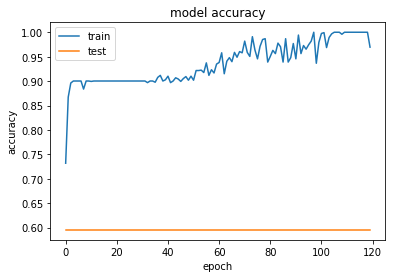

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

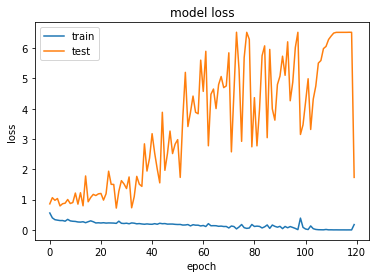

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()